# Bruker STD Analysis

In [16]:
import numpy as np
from pyNMR.viewer import gui as mygui

import pyNMR.model.parser.topSpin as T
import pyNMR.model.processor as P
import pyNMR.model.operations as O

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
data = T.TopSpin("./data/bruker/STD/2/")
print(data.title)

Processor = P.Processor([O.LeftShift(data.shiftPoints),
                         O.LineBroadening(0.0),
                         O.FourierTransform(),
                       O.Phase0D(140),
                        O.Phase1D(1.54e-4, unit="time"),
                        ])
Processor.runStack(data)

OP = O.SetPPMScale()
OP.run(data)
OP2 = O.Phase1D(1, pivot = 4, scale = "ppm")
OP2.run(data)
print("Time Shift: {:.2e} s".format(data.timeShift))


Left Shift
Exponential Linebroadening
LB: 0.0 Hz
Fourier Transform
Phase Zero Order
Phase First Order
Phase:  3.1011917720646287
Setting PPM Scale automatically with offset from acqus:  1883.17625
Phase:  1
Time Shift: 1.54e-04 s


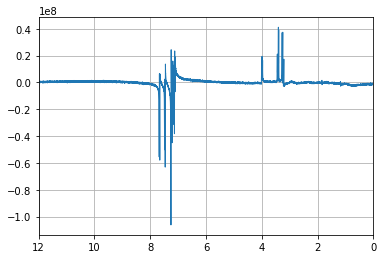

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(data.ppmScale, np.real(data.allSpectra[-1][0]), linewidth = 1)
plt.xlim(12,0)
plt.grid()